<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [6]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [18]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [19]:
boston_df=pd.read_csv(boston_url)


#### Add your code below following the instructions given in the course to complete the peer graded assignment


Task 1: Become familiar with the dataset
The following describes the dataset variables:
·      CRIM - per capita crime rate by town
·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
·      INDUS - proportion of non-retail business acres per town.
·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
·      NOX - nitric oxides concentration (parts per 10 million)
·      RM - average number of rooms per dwelling
·      AGE - proportion of owner-occupied units built prior to 1940
·      DIS - weighted distances to five Boston employment centres
·      RAD - index of accessibility to radial highways
·      TAX - full-value property-tax rate per $10,000
·      PTRATIO - pupil-teacher ratio by town
·      LSTAT - % lower status of the population
·      MEDV - Median value of owner-occupied homes in $1000's

In [47]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


In [21]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [22]:
boston_df.shape

(506, 14)

Task 2: Generate Descriptive Statistics and Visualizations
For all visualizations, please include a title in each graph and appropriate labels
Generate the following and explain your findings:

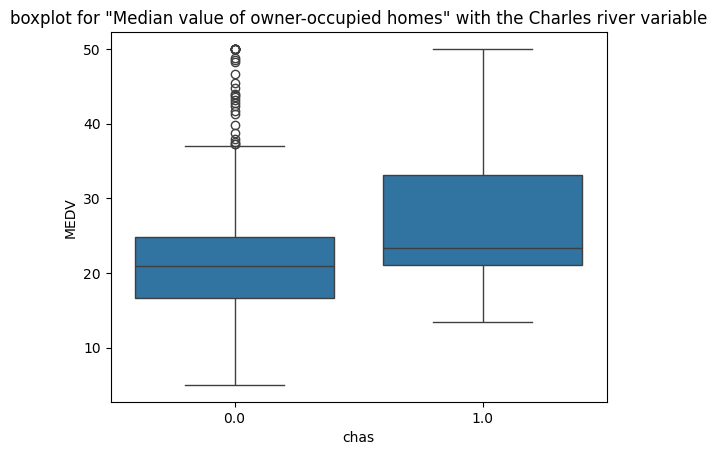

In [44]:
#For the "Median value of owner-occupied homes" provide a boxplot
ax = sns.boxplot(x='CHAS', y='MEDV', data=boston_df)
pyplot.xlabel('chas')
pyplot.ylabel('MEDV')
pyplot.title('boxplot for "Median value of owner-occupied homes" with the Charles river variable')
pyplot.show()

Text(0.5, 1.0, 'bar plot for the Charles river variable')

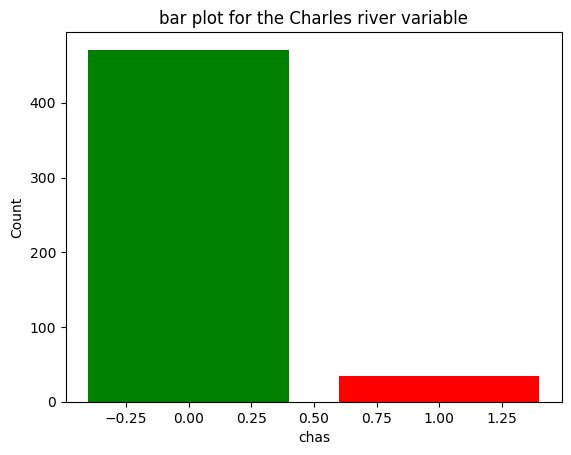

In [42]:
#Provide a  bar plot for the Charles river variable
sorted_counts = boston_df.CHAS.value_counts().sort_index()
pyplot.bar(sorted_counts.index, sorted_counts.values, color=['green', 'red'])
pyplot.xlabel('chas')
pyplot.ylabel('Count')
pyplot.title('bar plot for the Charles river variable')


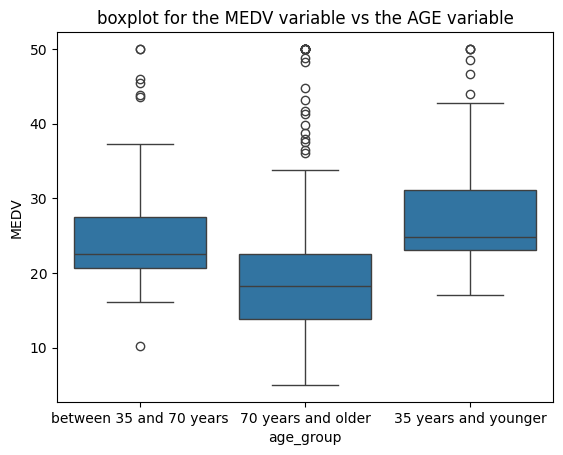

In [35]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
pyplot.xlabel('age_group')
pyplot.ylabel('MEDV')
pyplot.title('boxplot for the MEDV variable vs the AGE variable')
pyplot.show()

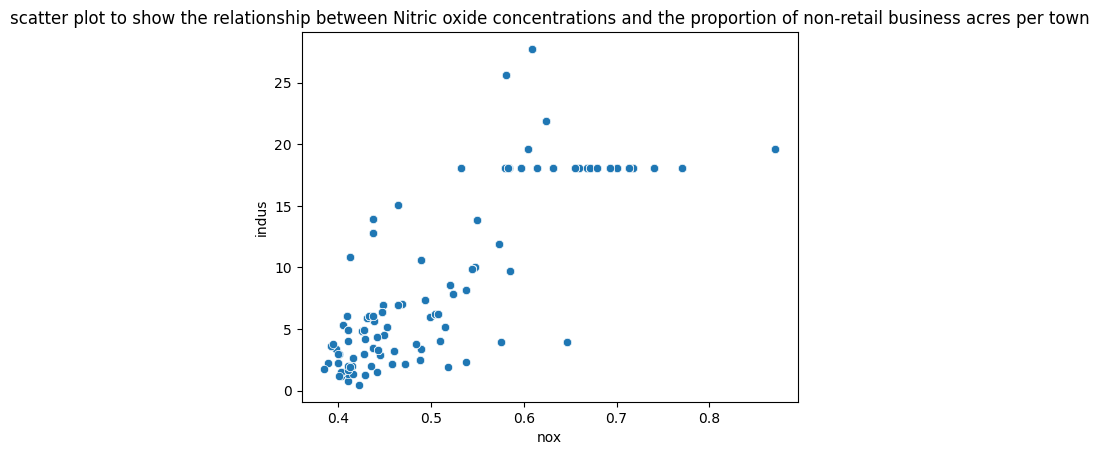

In [31]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of 
#non-retail business acres per town. What can you say about the relationship?

ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.xlabel('nox')
pyplot.ylabel('indus')
pyplot.title('scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
pyplot.show()

Text(0.5, 1.0, 'histogram for the pupil to teacher ratio variable')

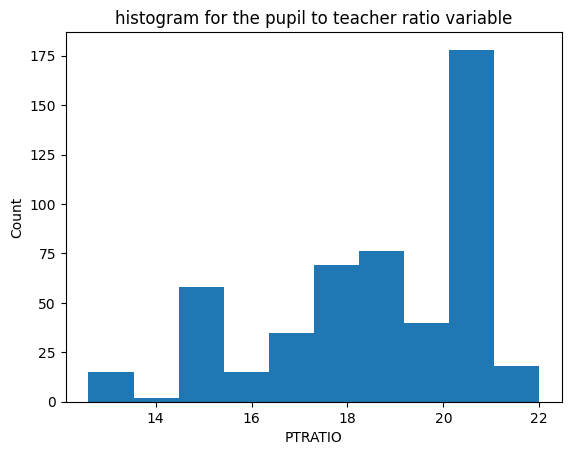

In [27]:
#Create a histogram for the pupil to teacher ratio variable
pyplot.hist(boston_df['PTRATIO'])
pyplot.xlabel('PTRATIO')
pyplot.ylabel('Count')
pyplot.title('histogram for the pupil to teacher ratio variable')


Task 3: Use the appropriate tests to answer the questions provided.
For each of the following questions;
Be sure to:
State your hypothesis.
Use α = 0.05
Perform the test Statistics.
State the conclusion from the test.

In [48]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for #independent samples)

# there is no difference  in median value of houses bounded by the Charles river or not

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Conclusion: Since the p-value is more than alpha value 0.05, we can not reject the null hypothesis
"there is no difference  in median value of houses bounded by the Charles river or not"

In [49]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')


LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

since the p-value is more than 0.05, the variance are equal

In [50]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation
#H0  NOX score is not correlated with INDUS
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

 Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between NOX and INDUS

In [51]:
#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
#H0 additional weighted distance  to the five Boston employment centres has no effect on the median value of owner occupied homes)

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 19 Feb 2025   Prob (F-statistic):           1.21e-08
Time:                        22:21:27   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: p < 0.05 there is evidence of correlation between